In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import pandas as pd
import networkx as nx
import tensorflow as tf
import numpy as np
from utils.utils import predict
import matplotlib.pyplot as plt

In [2]:
model_m_to_s = tf.keras.models.load_model("./model/gbif_batch_128_layer_1024_m_to_s", compile=True)
model_s_to_m = tf.keras.models.load_model("./model/gbif_batch_128_layer_1024_s_to_m", compile=True)

In [3]:
species_features_dummy = pd.read_csv("./data/species_features.csv.gz", index_col=0)
molecule_features_dummy = pd.read_csv("./data/molecule_features.csv.gz", index_col=0)
df_agg = pd.read_csv("./data/lotus_agg_test.csv.gz", index_col=0)

In [4]:
rdkit = pd.read_csv("./data/mol_dummy_rdkit.csv.gz", index_col=0).astype('uint8')
rdkit.columns = rdkit.columns.astype(str)

In [5]:
g_train = nx.read_graphml("./graph/train_graph.gml")
g = nx.read_graphml("./graph/test_graph.gml")
g  = nx.create_empty_copy(g)
g_merged = nx.compose(g_train, g)

In [6]:
df_agg_train = pd.read_csv("./data/lotus_agg_train.csv.gz", index_col=0)

In [23]:
g_test = nx.read_graphml("./graph/test_graph.gml")
g_lotus = nx.compose(g_train, g_test)

In [8]:
sku = pd.concat([df_agg, df_agg_train])

In [9]:
sp = 'Trigonostemon reidioides'
data_3 = pd.DataFrame(
    {'molecule': list(set(molecule_features_dummy.index)-set(sku[sku.organism_name==sp].structure_smiles_2D)),
     'species': sp})

In [10]:
data_3

,molecule,species
0,CC(C)=CCc1c(O)cc2oc(-c3ccc(O)cc3O)c(CC=C(C)C)c...,Trigonostemon reidioides
1,CC=C(C)C(=O)C(C)c1cc(O)cc(O)c1,Trigonostemon reidioides
2,CC(=O)OC1C(O)COC(OC2C(O)C(C)OC(OC3C(OC4CCC5(C)...,Trigonostemon reidioides
3,CC(C=CC=C(C)C=Cc1ccc(C(=O)O)c(C)c1C)=CC=CC=C(C...,Trigonostemon reidioides
4,OCC1OC(OCC2OC(OCc3ccccc3)C(O)C(O)C2O)C(O)C(O)C1O,Trigonostemon reidioides
...,...,...
147728,CCC(C)C1NC(=O)C2CCCN2C(=O)C(Cc2ccccc2)N(C)C(=O...,Trigonostemon reidioides
147729,CC1=CCCC2C1(C)CCC(C)C2(C)CC1=C(O)C(=O)C(=O)C=C1O,Trigonostemon reidioides
147730,CC(N)C(O)C=Cc1ccccc1,Trigonostemon reidioides
147731,CC12CCC3C(C)(C)C(=O)CCC3(C)C1CCC1C3(C)CCC(O)C(...,Trigonostemon reidioides


In [11]:
out_3 = predict(g_lotus,
                model_m_to_s,
                model_s_to_m,
                data_3,
                molecule_features_dummy,
                rdkit,
                species_features_dummy
               )

Converting Inchikeys to SMILES...
Getting missing features...
Converting species taxonomy as numeric...
Converting molecules as numeric...
Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetworkX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184194, Edges: 869484

 Node types:
  molecule: [147747]
    Features: float32 vector, length 155
    Edge types: molecule-present_in->species
  species: [36447]
    Features: float32 vector, length 69
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [434742]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [434742]
        Weights: all 1 (default)
        Features: none
Creating 'forward', 'backward' flow for KNOWN molecule AND species...


KeyboardInterrupt: 

In [ ]:
plt.hist(out_3.prob, bins=200)

In [ ]:
out_3[out_3.prob>0.95]

# Test 4: let's see if cholesterol is present "everywhere"


In [17]:
mol = 'CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C'
data_4 = pd.DataFrame(
    {'molecule': mol,
     'species': list(set(species_features_dummy.index)-set(sku[sku.structure_smiles_2D==mol].organism_name))})

In [24]:
out_4 = predict(g_lotus,
                model_m_to_s,
                model_s_to_m,
                data_4,
                molecule_features_dummy,
                rdkit,
                species_features_dummy
               )

Converting Inchikeys to SMILES...
Getting missing features...
Converting species taxonomy as numeric...
Converting molecules as numeric...
Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetworkX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184195, Edges: 869484

 Node types:
  molecule: [147748]
    Features: float32 vector, length 155
    Edge types: molecule-present_in->species
  species: [36447]
    Features: float32 vector, length 69
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [434742]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [434742]
        Weights: all 1 (default)
        Features: none
Creating mol to species flow...
Predicting mol to species...
36/36 [==============================] - 5s 133ms/step


(array([2108., 1081.,  784.,  677.,  594.,  479.,  450.,  420.,  352.,
         362.,  290.,  292.,  290.,  289.,  295.,  261.,  214.,  225.,
         252.,  234.,  238.,  216.,  201.,  205.,  229.,  200.,  184.,
         203.,  185.,  167.,  155.,  167.,  170.,  165.,  179.,  170.,
         149.,  160.,  148.,  154.,  147.,  170.,  170.,  156.,  165.,
         143.,  119.,  116.,  125.,  147.,  142.,  118.,  129.,  131.,
         144.,  149.,  149.,  124.,  122.,  124.,  145.,  130.,  148.,
         135.,  122.,  128.,  123.,  128.,  137.,  136.,  126.,  125.,
         126.,  127.,  139.,  150.,  125.,  118.,  113.,  126.,  129.,
         116.,  124.,  114.,  152.,  128.,  119.,  124.,  133.,  132.,
         136.,  115.,  156.,  149.,  171.,  132.,  147.,  139.,  136.,
         143.,  129.,  120.,  138.,  118.,  131.,  136.,  163.,  128.,
         139.,  134.,  130.,  141.,  160.,  140.,  131.,  140.,  149.,
         161.,  164.,  118.,  132.,  136.,  142.,  145.,  137.,  166.,
      

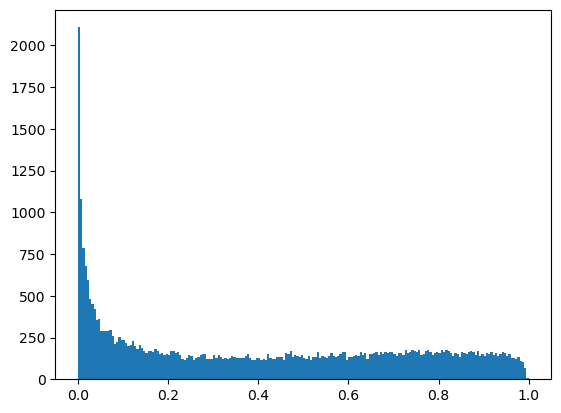

In [25]:
plt.hist(out_4.prob, bins=200)

In [26]:
out_4[out_4.prob>0.99]

,molecule,species,model,prob
182,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Sinularia leptoclados,m_to_s,0.992527
284,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Torulopsis glabrata,m_to_s,0.994056
774,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Haliclona oculata,m_to_s,0.992309
852,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Acanthamoeba culbertsoni,m_to_s,0.990475
956,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Sinularia lochmodes,m_to_s,0.993478
...,...,...,...,...
32654,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Dendronephthya gigantea,m_to_s,0.994449
32810,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Asteropsis carinifera,m_to_s,0.992173
33258,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Thymosiopsis,m_to_s,0.993350
36179,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Abies forrestii,m_to_s,0.996736


# Test 5: test with a more rare molecule 

In [ ]:
mol = 'CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(OC2OC(C)CC(N(C)C)C2O)C(C)(O)CC(C)C(=O)C(C)C(O)C1(C)O'
data_5 = pd.DataFrame(
    {'molecule': mol,
     'species': list(set(species_features_dummy.index)-set(sku[sku.structure_smiles_2D==mol].organism_name))}
)

In [ ]:
out_5 = predict(g_lotus,
                model_m_to_s,
                model_s_to_m,
                data_5,
                molecule_features_dummy,
                rdkit,
                species_features_dummy
               )

In [ ]:
plt.hist(out_5.prob, bins=200)

In [ ]:
out_5[out_5.prob>0.95]

# Test adding just one edge to an unkown molecule to see the difference

In [29]:
mol = 'CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C'
data_6 = pd.DataFrame(
    {'molecule': mol,
     'species': list(set(species_features_dummy.index)-set(sku[sku.structure_smiles_2D==mol].organism_name))})

In [62]:
g_lotus.add_node('CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', label='molecule')
g_lotus.add_edge('CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', 'Mus musculus', label='present_in')
g_lotus.add_edge('Mus musculus','CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', label='has')

In [30]:
from utils.molecules import smiles_to_classyfire, smiles_to_fingerprint

In [33]:
chol_classy = smiles_to_classyfire(['CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C'])

In [45]:
chol_fp = smiles_to_fingerprint(['CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C'])
chol_fp.columns  = chol_fp.columns.astype(str)

In [56]:
pd.concat([rdkit, chol_fp])

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
COc1cc2c3c(ccnc3c1OC)NC=C2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,0
CC(C)CCCC(C)C1CCC2C3=CCC4CC(O)CCC4(C)C3CCC21C,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,1,1,0,0,0,0
CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,0,1,0,0,0,0,0,1,1,0,...,0,1,1,1,1,1,0,0,0,0
CC(C)CCCC(C)C1CCC2C3CCC4CC(O)CCC4(C)C3CCC12C,0,1,0,0,0,0,0,1,1,0,...,0,1,0,0,1,1,0,0,0,0
COC1=Cc2ccnc3c2C1(O)C(CC(C)=O)=NC=C3,1,0,1,0,0,1,0,0,0,0,...,0,0,0,1,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
O=C1C(=O)c2[nH]cc3c2C(=C1Cl)NCC3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
O=C1C(NCCc2ccccc2)=CC2=NCCc3c[nH]c1c32,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
Oc1ccc(C=CNc2cc3c4c(c2O)N=CC=4CCN=3)cc1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
[H]N=C1C=C2c3c(cn(C)c3C1=O)CCN2C,0,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [53]:
len(g_lotus.nodes)-36447

147748

In [63]:
out_6 = predict(g_lotus,
                model_m_to_s,
                model_s_to_m,
                data_6,
                pd.concat([molecule_features_dummy, chol_classy]),
                pd.concat([rdkit, chol_fp]),
                species_features_dummy
               )

Converting Inchikeys to SMILES...
Getting missing features...
Converting species taxonomy as numeric...
Converting molecules as numeric...
Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetworkX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184195, Edges: 869486

 Node types:
  molecule: [147748]
    Features: float32 vector, length 155
    Edge types: molecule-present_in->species
  species: [36447]
    Features: float32 vector, length 69
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [434743]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [434743]
        Weights: all 1 (default)
        Features: none
Creating 'forward', 'backward' flow for KNOWN molecule AND species...
Predict both : running molecule to species predictions...
36/36 [==============================] - 5s 133ms/step
Predict both : running species to molecules prediction...
36/

(array([433., 625., 618., 636., 494., 485., 439., 437., 449., 410., 447.,
        363., 376., 376., 380., 351., 331., 306., 317., 268., 282., 270.,
        285., 247., 268., 253., 267., 236., 246., 248., 241., 252., 241.,
        254., 258., 225., 205., 225., 224., 214., 198., 215., 186., 182.,
        212., 219., 222., 204., 210., 182., 212., 217., 197., 204., 195.,
        219., 195., 211., 193., 184., 179., 190., 200., 181., 200., 187.,
        209., 189., 155., 173., 201., 169., 181., 147., 175., 177., 206.,
        168., 166., 198., 161., 183., 174., 188., 181., 167., 171., 178.,
        178., 205., 180., 144., 175., 174., 176., 168., 157., 189., 171.,
        148., 157., 154., 131., 153., 166., 165., 163., 123., 137., 152.,
        151., 152., 157., 170., 135., 139., 128., 140., 149., 153., 157.,
        169., 141., 142., 129., 171., 145., 131., 134., 132., 138., 131.,
        102., 127., 133., 103., 116., 132., 130., 122., 118., 120., 125.,
        113., 129.,  98., 109., 117., 

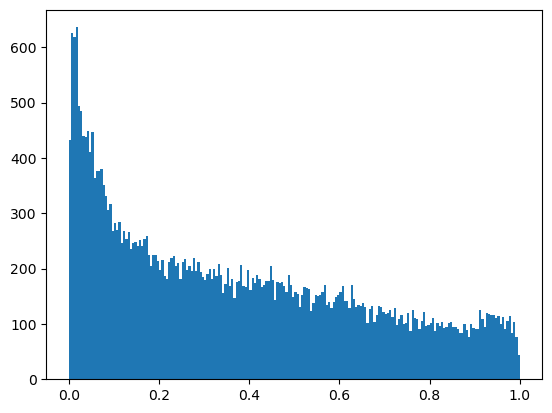

In [64]:
plt.hist(out_6.prob, bins=200)

In [66]:
out_6[out_6.prob>0.99]

,molecule,species,model,prob
620,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Synechococcus elongatus,both_known,0.994820
1014,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Parastichopus regalis,both_known,0.993095
1741,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Rhodobacter sphaeroides,both_known,0.997352
2260,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Bacillus firmus,both_known,0.993262
2561,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Eutreptia viridis,both_known,0.996136
...,...,...,...,...
35592,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Coturnix japonica,both_known,0.994373
35660,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Crassostrea gigas,both_known,0.993266
35708,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Pseudo-nitzschia multistriata,both_known,0.992415
35977,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Microcoleus amoenus,both_known,0.993331
